Part 01 - General Exploration

In [100]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
plt.style.use('fivethirtyeight')
sns.set_style(style="whitegrid")


df = pd.read_csv("2021 New Coder Survey.csv", dtype={"8. About how many months have you been programming?":float, "9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?":float})
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df = df.dropna(axis=0, subset=["1. What is your biggest reason for learning to code?"])

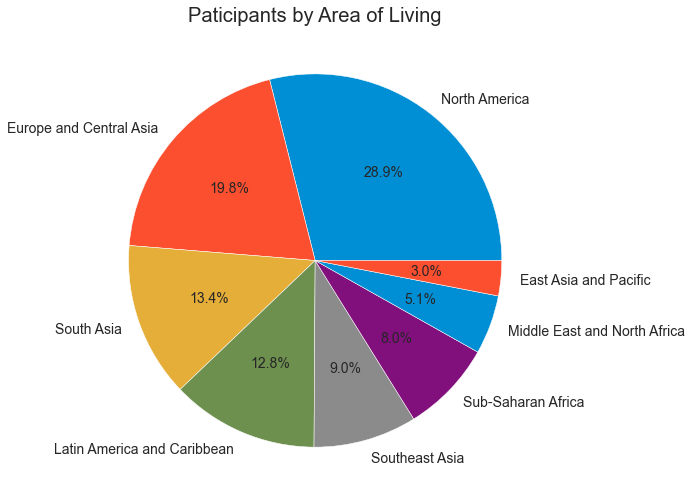

In [101]:

y= df["26. Which part of the world do you live in?"].value_counts()
fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("Paticipants by Area of Living")
plt.show()



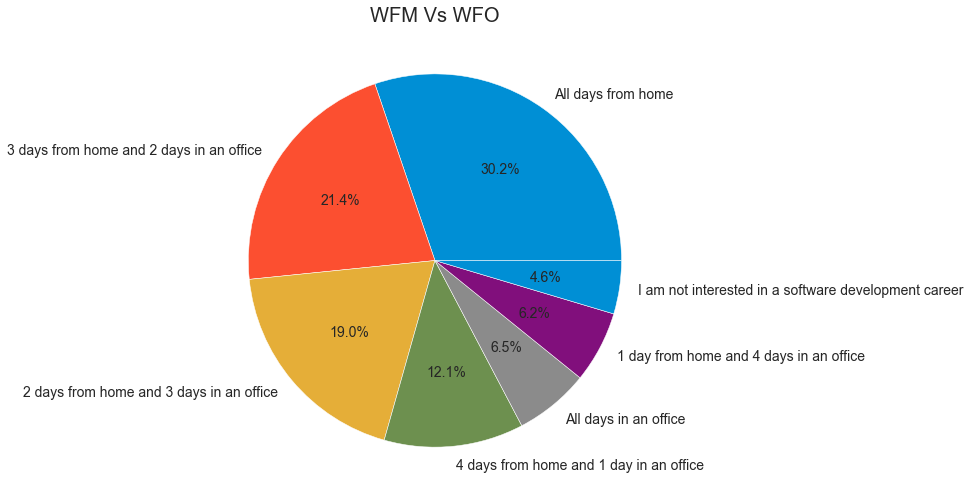

In [102]:
y = df["18. After the pandemic, how many days would you ideally like to work from home versus in an office each week?"].value_counts()

fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("WFM Vs WFO")
plt.show()

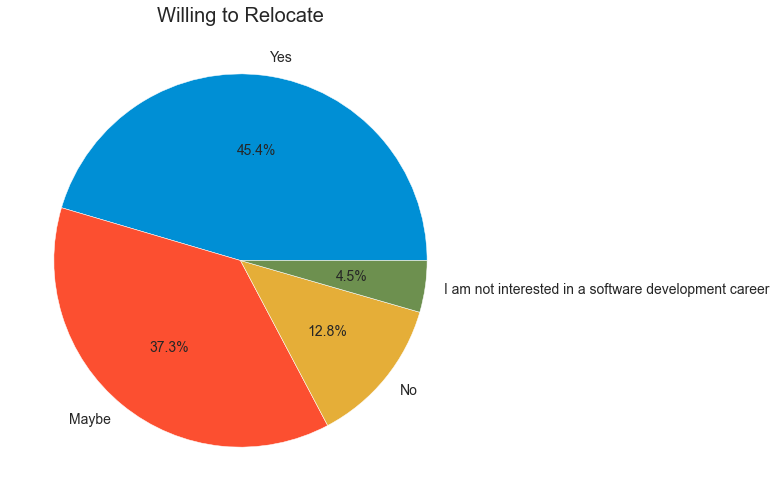

In [103]:
y = df["19. Are you willing to relocate for a job?"].value_counts()

fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("Willing to Relocate")
plt.show()

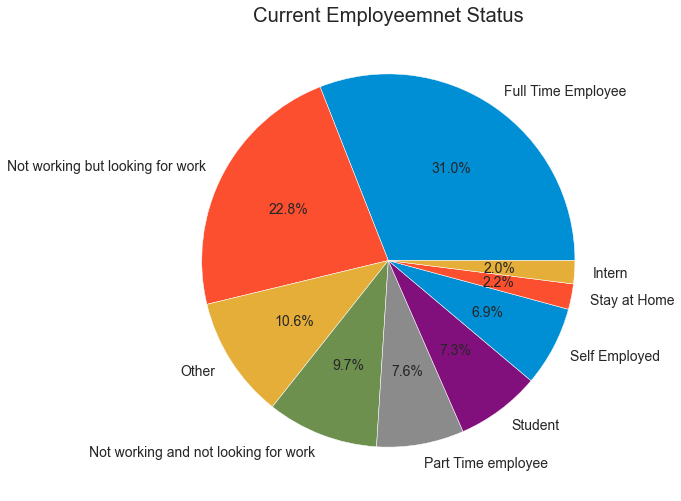

In [104]:
def get_employment_status(row):
    if not isinstance(row["20. Regarding employment status, are you currently.... "],str):
        return "Other"
    elif "full time employe" in row["20. Regarding employment status, are you currently.... "].lower().replace("-"," "):
        return "Full Time Employee"
    elif "not working but looking for work" in row["20. Regarding employment status, are you currently.... "].lower().replace("-"," "):
        return "Not working but looking for work"
    elif "not working and not looking for work" in row["20. Regarding employment status, are you currently.... "].lower().replace("-"," "):
        return "Not working and not looking for work"
    elif "part time employed" in row["20. Regarding employment status, are you currently.... "].lower().replace("-"," "):
        return "Part Time employee"
    elif "self employed" in row["20. Regarding employment status, are you currently.... "].lower().replace("-"," "):
        return "Self Employed"
    elif "student" in row["20. Regarding employment status, are you currently.... "].lower().replace("-"," "):
        return "Student"
    elif "grader" in row["20. Regarding employment status, are you currently.... "].lower().replace("-"," "):
        return "Student"
    elif "intern" in row["20. Regarding employment status, are you currently.... "].lower().replace("-"," "):
        return "Intern"
    elif "stay at home" in row["20. Regarding employment status, are you currently.... "].lower().replace("-"," "):
        return "Stay at Home"
    else:
        return "Other"

df['Employeement Status'] = df.apply(lambda row: get_employment_status(row), axis=1)

y = df["Employeement Status"].value_counts()

fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("Current Employeemnet Status")
plt.savefig('chart.png')
plt.show()




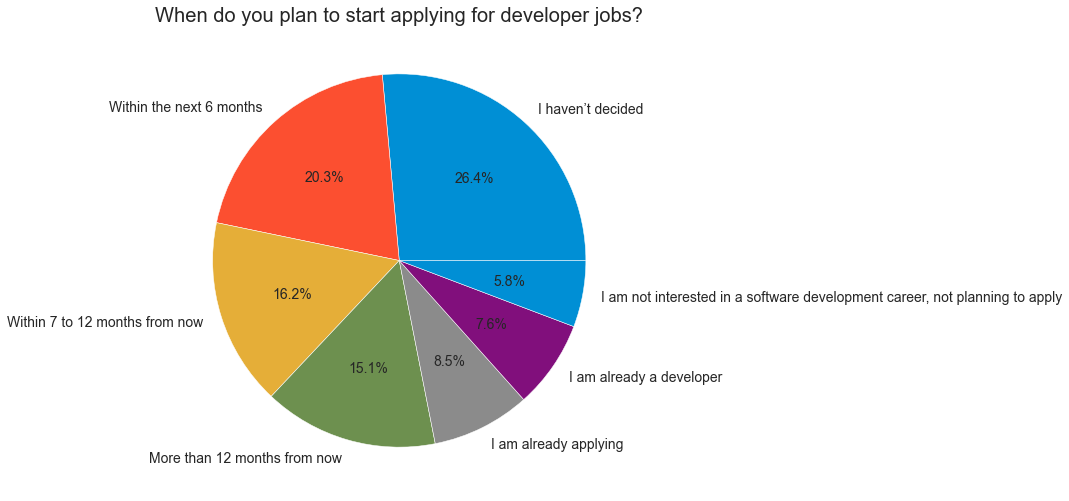

In [105]:
df0 = df.loc[:,["15. When do you plan to start applying for developer jobs?"]]
df0 = df0.dropna(axis=0, subset=["15. When do you plan to start applying for developer jobs?"])

y = df0["15. When do you plan to start applying for developer jobs?"].value_counts()

fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("When do you plan to start applying for developer jobs?")
plt.show()


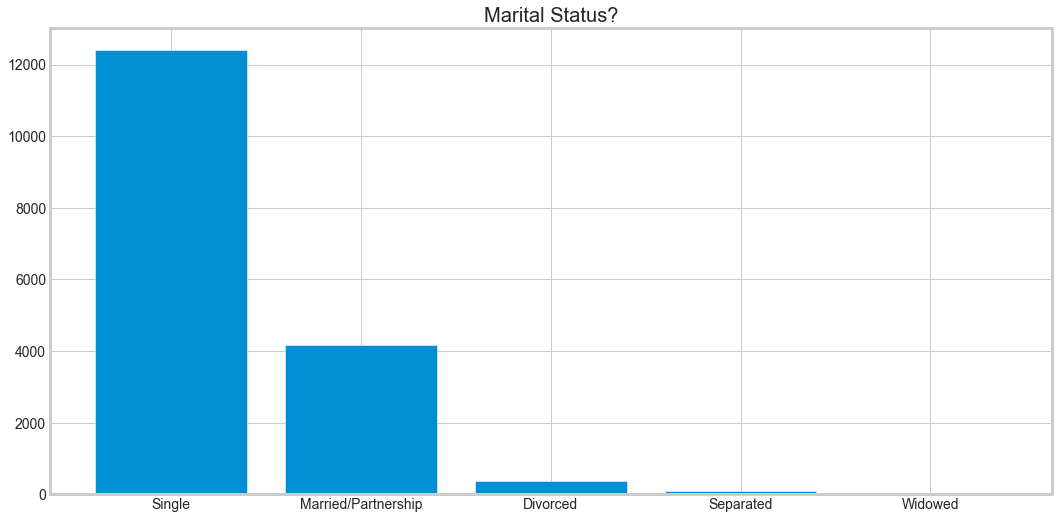

In [106]:
df["35. What's your marital status?"].replace({"Single, never married": "Single","Married or domestic partnership": "Married/Partnership"}, inplace=True)
y = df["35. What's your marital status?"].value_counts()

fig = plt.figure(figsize=(16, 8))
plt.bar(height = y, x = y.index)
plt.title("Marital Status?")
plt.show()

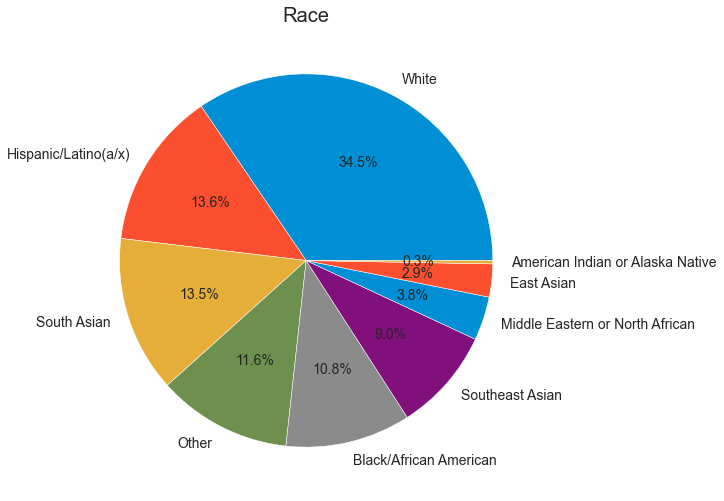

In [107]:

race_list = ["White","Hispanic/Latino(a/x)","South Asian","Black/African American","Southeast Asian","Middle Eastern or North African", "East Asian","American Indian or Alaska Native"]

def get_race(row):
    if row["25. With which of these groups do you primarily identify?"] in race_list:
        return row["25. With which of these groups do you primarily identify?"]
    else:
        return "Other"

df['Race'] = df.apply(lambda row: get_race(row), axis=1)

y = df["Race"].value_counts()

fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("Race")
plt.show()

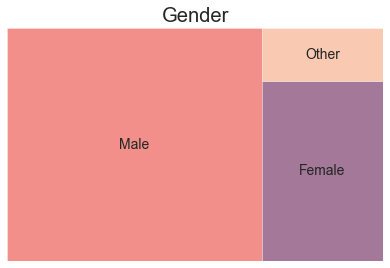

In [108]:
def get_gender(row):
    if not isinstance(row["24. Which of the following best represents how you think of yourself?"],str):
        return "Other"
    elif "female" in row["24. Which of the following best represents how you think of yourself?"].lower().replace("-"," "):
        return "Female"
    elif "male" in row["24. Which of the following best represents how you think of yourself?"].lower().replace("-"," "):
        return "Male"
    else:
        return "Other"

df['Gender'] = df.apply(lambda row: get_gender(row), axis=1)

y = df["Gender"].value_counts()

"""fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("Gender")
plt.show()"""

sizes = y
labels = y.index

squarify.plot(sizes=sizes, label=labels, alpha=0.6).set(title='Gender')
plt.axis('off')
plt.show()

Part 02 - Subset of White people

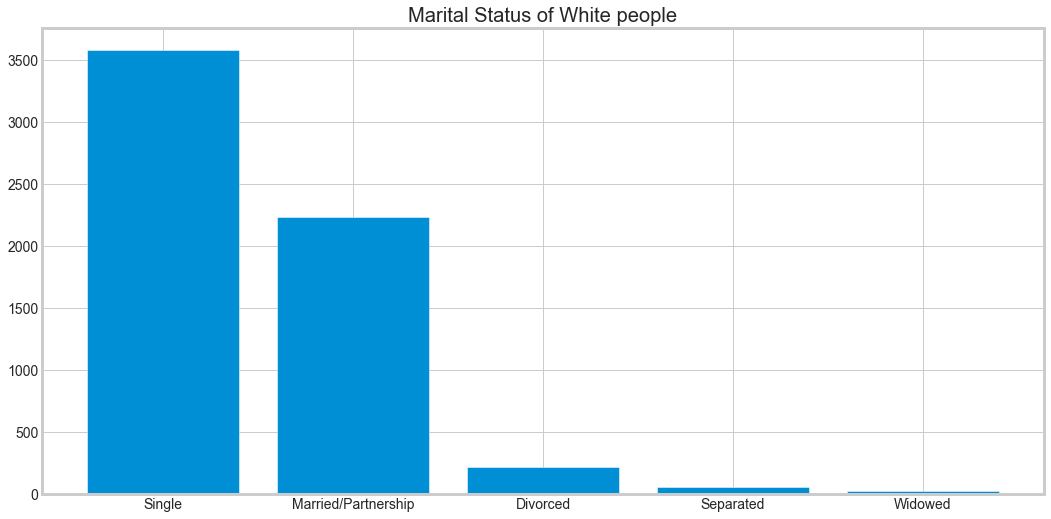

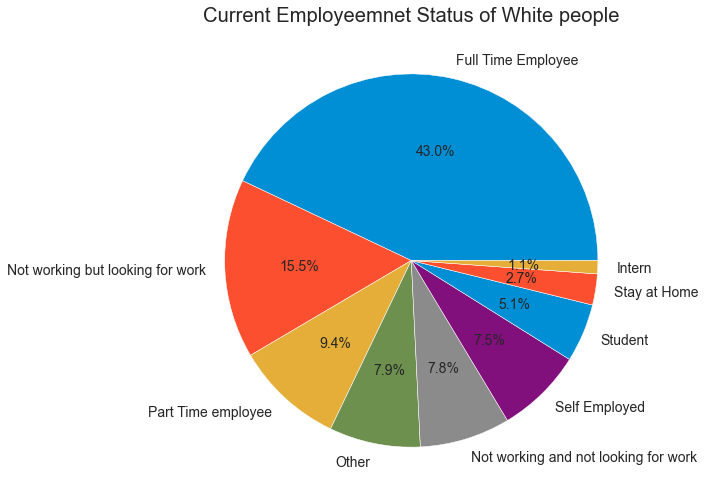

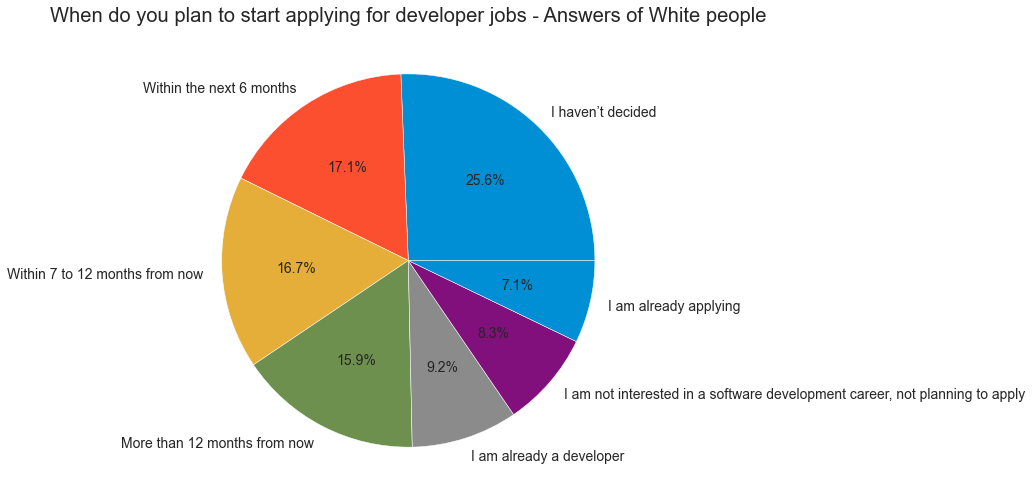

In [109]:
df0 = df.loc[df["25. With which of these groups do you primarily identify?"]=="White"]
y = df0["35. What's your marital status?"].value_counts()

fig = plt.figure(figsize=(16, 8))
plt.bar(height = y, x = y.index)
plt.title("Marital Status of White people")
plt.show()


y = df0["Employeement Status"].value_counts()

fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("Current Employeemnet Status of White people")
plt.show()

y = df0["15. When do you plan to start applying for developer jobs?"].value_counts()

fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("When do you plan to start applying for developer jobs - Answers of White people")
plt.show()

Part 03 - Subset of Female

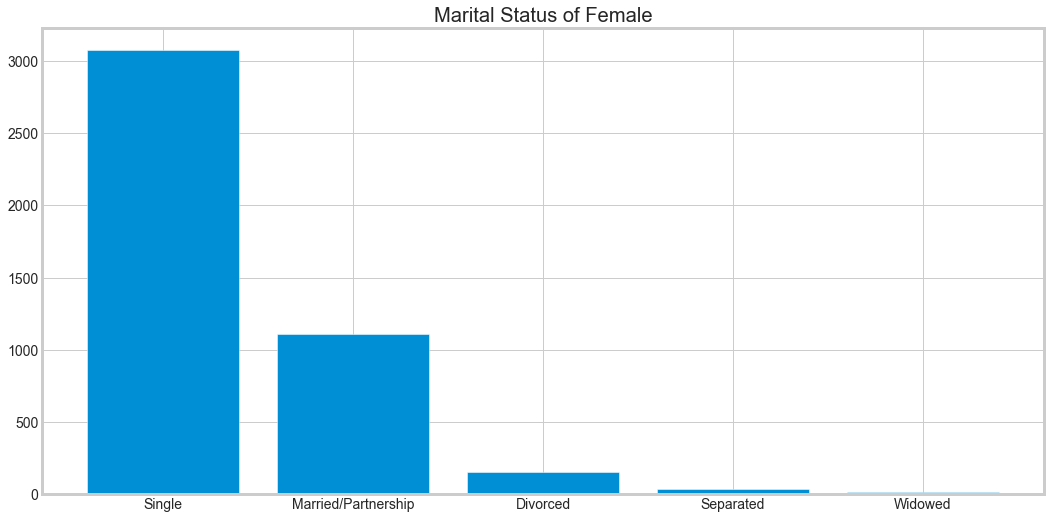

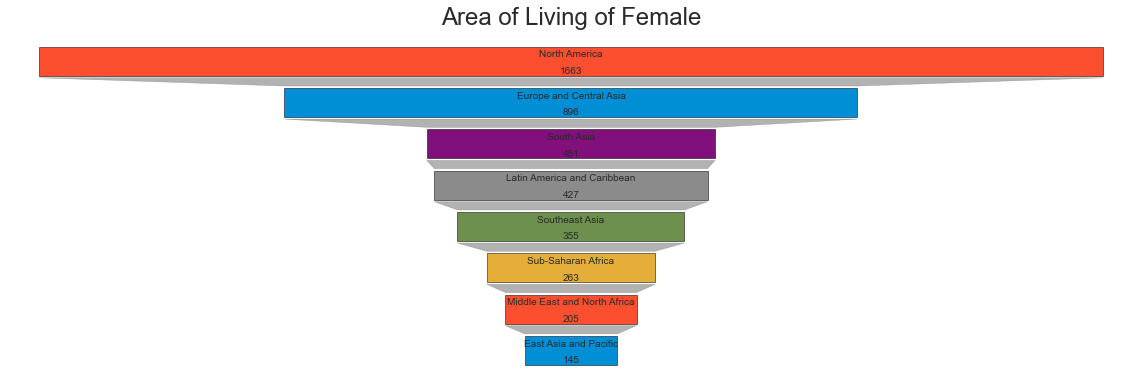

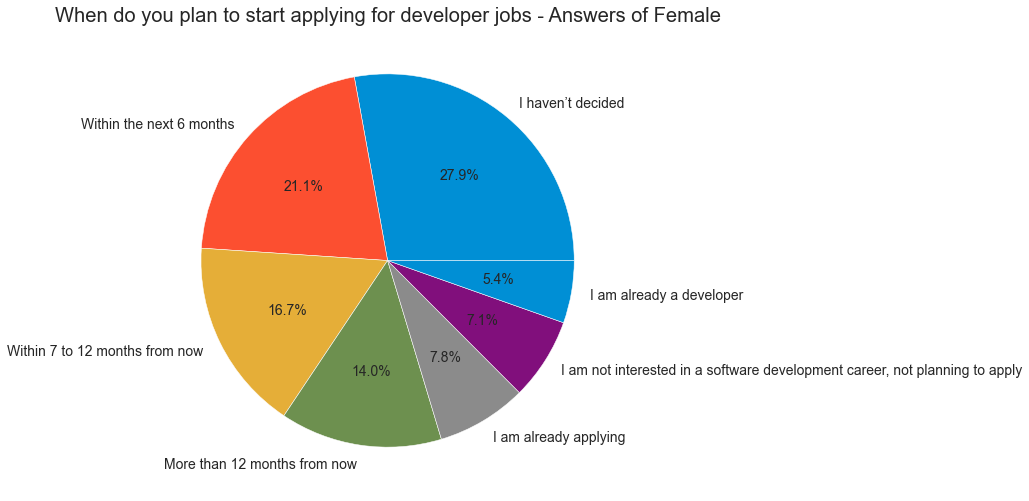

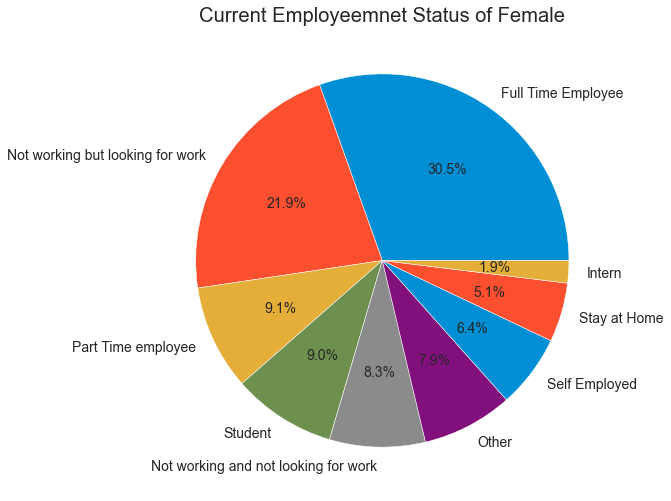

In [110]:
df0 = df.loc[df["Gender"]=="Female"]
y = df0["35. What's your marital status?"].value_counts()

fig = plt.figure(figsize=(16, 8))
plt.bar(height = y, x = y.index)
plt.title("Marital Status of Female")
plt.show()


y = df0["26. Which part of the world do you live in?"].value_counts()

"""fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("Area of Living of Female")
plt.show()"""


labels = y.index.to_list()[::-1]
x=y.to_list()[::-1]
y=[1,2,3,4,5,6,7,8]


x_max = max(x)+100
x_min = 0
x_range = x_max - x_min


fig, ax = plt.subplots(1, figsize=(18,6))

for idx, val in enumerate(x):
    left = (x_range  - val)/2
    plt.barh(y[idx], x[idx], left = left, height=.7, edgecolor='black')
    plt.text(x_range/2, y[idx]-0.3, x[idx], ha='center',  fontsize=10, color='#2A2A2A')
    plt.text(x_range/2, y[idx]+.1, labels[idx], ha='center', fontsize=10, color='#2A2A2A')

    if idx != len(x)-1:
        next_left = (x_range - x[idx+1])/2
        shadow_x = [left, next_left, x_range-next_left, x_range-left, left]
        
        shadow_y = [y[idx]+0.4, y[idx+1]-0.4, y[idx+1]-0.4, y[idx]+0.4, y[idx]+0.4]
        
        plt.fill(shadow_x, shadow_y, color='grey', alpha=0.6)

plt.axis('off')
plt.xlim(x_min, x_max)

plt.title('Area of Living of Female', loc='center', fontsize=24, color='#2A2A2A')
plt.show()


y = df0["15. When do you plan to start applying for developer jobs?"].value_counts()

fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("When do you plan to start applying for developer jobs - Answers of Female")
plt.show()

y = df0["Employeement Status"].value_counts()

fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("Current Employeemnet Status of Female")
plt.show()



Part 04 - Analyse of Multiselect Answers

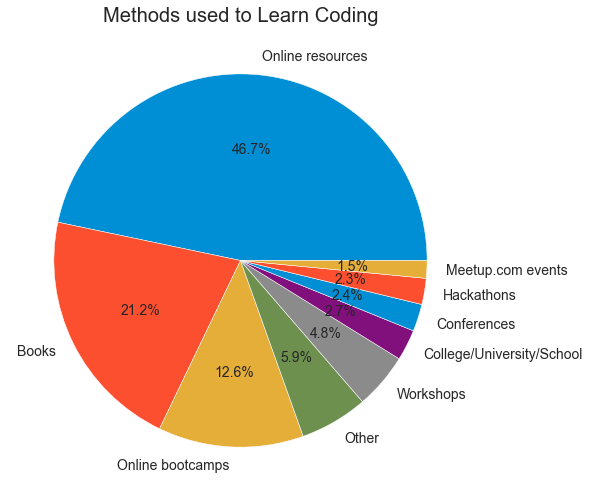

In [111]:
methods = df['2. What methods have you used to learn about coding? Please select all that apply.'].str.split(',',expand=True)

df0=methods.stack()

df0 = pd.DataFrame(df0)

def get_method(row):
    if not isinstance(row[0],str):
        return "Other"
    elif "online resources" in row[0].lower().replace("-"," "):
        return "Online resources"
    elif "udemy" in row[0].lower().replace("-"," "):
        return "Online resources"
    elif "youtube" in row[0].lower().replace("-"," "):
        return "Online resources"
    elif "online bootcamps" in row[0].lower().replace("-"," "):
        return "Online bootcamps"
    elif "books" in row[0].lower().replace("-"," "):
        return "Books"
    elif "workshops" in row[0].lower().replace("-"," "):
        return "Workshops"
    elif "conferences" in row[0].lower().replace("-"," "):
        return "Conferences"
    elif "hackathons" in row[0].lower().replace("-"," "):
        return "Hackathons"
    elif "meetup.com events" in row[0].lower().replace("-"," "):
        return "Meetup.com events"
    elif "university" in row[0].lower().replace("-"," "):
        return "College/University/School"
    elif "college" in row[0].lower().replace("-"," "):
        return "College/University/School"
    elif "school" in row[0].lower().replace("-"," "):
        return "College/University/School"
    else:
        return "Other"

df0['Method'] = df0.apply(lambda row: get_method(row), axis=1)

y = df0["Method"].value_counts()
fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("Methods used to Learn Coding")
plt.show()



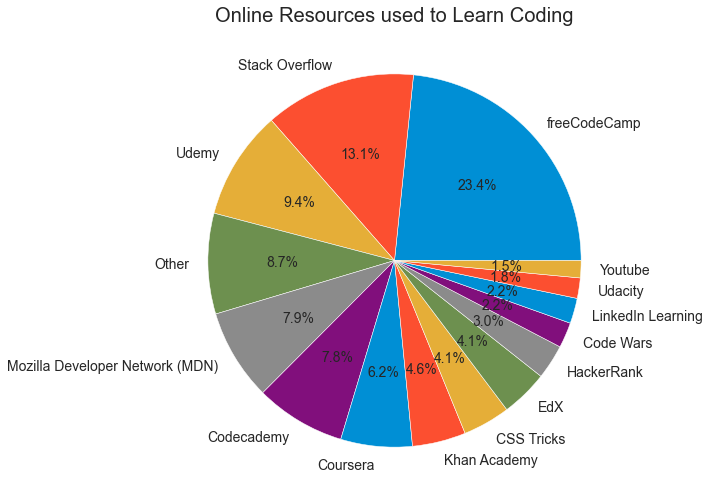

In [112]:
online_resource = df['3. Which online learning resources have you found helpful? Please select all that apply.'].str.split(',',expand=True)
df0=online_resource.stack()

df0 = pd.DataFrame(df0)

def get_resource(row):
    if not isinstance(row[0],str):
        return "Other"
    elif "freecodecamp" in row[0].lower().replace("-"," "):
        return "freeCodeCamp"
    elif "stack overflow" in row[0].lower().replace("-"," "):
        return "Stack Overflow"
    elif "udemy" in row[0].lower().replace("-"," "):
        return "Udemy"
    elif "codecademy" in row[0].lower().replace("-"," "):
        return "Codecademy"
    elif "mdn" in row[0].lower().replace("-"," "):
        return "Mozilla Developer Network (MDN)"
    elif "coursera" in row[0].lower().replace("-"," "):
        return "Coursera"
    elif "khan academy" in row[0].lower().replace("-"," "):
        return "Khan Academy"
    elif "css tricks" in row[0].lower().replace("-"," "):
        return "CSS Tricks"
    elif "edx" in row[0].lower().replace("-"," "):
        return "EdX"
    elif "hackerrank" in row[0].lower().replace("-"," "):
        return "HackerRank"
    elif "code wars" in row[0].lower().replace("-"," "):
        return "Code Wars"
    elif "linkedin learning" in row[0].lower().replace("-"," "):
        return "LinkedIn Learning"
    elif "lynda.com" in row[0].lower().replace("-"," "):
        return "LinkedIn Learning"
    elif "youtube" in row[0].lower().replace("-"," "):
        return "Youtube"
    elif "udacity" in row[0].lower().replace("-"," "):
        return "Udacity"
    else:
        return "Other"

df0['Online Resource'] = df0.apply(lambda row: get_resource(row), axis=1)

y = df0["Online Resource"].value_counts()
fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("Online Resources used to Learn Coding")

plt.show()

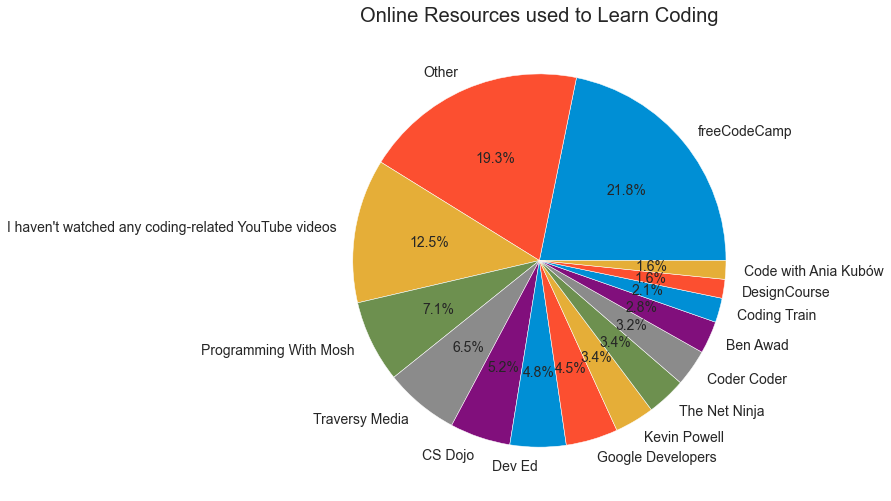

In [113]:
channels = df['6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.'].str.split(',',expand=True)
df0=channels.stack()

df0 = pd.DataFrame(df0)
def get_channel(row):
    if not isinstance(row[0],str):
        return "Other"
    elif "freecodecamp" in row[0].lower().replace("-"," "):
        return "freeCodeCamp"
    elif "haven't" in row[0].lower().replace("-"," "):
        return "I haven't watched any coding-related YouTube videos"
    elif "programming with mosh" in row[0].lower().replace("-"," "):
        return "Programming With Mosh"
    elif "traversy media" in row[0].lower().replace("-"," "):
        return "Traversy Media"
    elif "cs dojo" in row[0].lower().replace("-"," "):
        return "CS Dojo"
    elif "dev ed" in row[0].lower().replace("-"," "):
        return "Dev Ed"
    elif "google developers" in row[0].lower().replace("-"," "):
        return "Google Developers"
    elif "kevin powell" in row[0].lower().replace("-"," "):
        return "Kevin Powell"
    elif "the net ninja" in row[0].lower().replace("-"," "):
        return "The Net Ninja"
    elif "coder coder" in row[0].lower().replace("-"," "):
        return "Coder Coder"
    elif "ben awad" in row[0].lower().replace("-"," "):
        return "Ben Awad"
    elif "coding train" in row[0].lower().replace("-"," "):
        return "Coding Train"
    elif "designcourse" in row[0].lower().replace("-"," "):
        return "DesignCourse"
    elif "code with ania kubów" in row[0].lower().replace("-"," "):
        return "Code with Ania Kubów"
    else:
        return "Other"

df0['YouTube Channel'] = df0.apply(lambda row: get_channel(row), axis=1)

y = df0["YouTube Channel"].value_counts()
fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index, autopct='%.1f%%')
plt.title("Online Resources used to Learn Coding")
#plt.savefig('foo.png')
plt.show()
